In [1]:
import os, sys
import h5py
import numpy as np
from numpy import genfromtxt
import nibabel as nb
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import pygeodesic
import pygeodesic.geodesic as geodesic
from nibabel.freesurfer.io import read_geometry
from nilearn.plotting.surf_plotting import load_surf_data
from nilearn.plotting.surf_plotting import load_surf_mesh
from brainspace.gradient import GradientMaps
from brainspace.plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels
from brainspace.datasets import load_conte69
from brainspace.null_models import SpinPermutations
import hcp_utils
# in house modules from the repo:
import plot_funcs                                
from plot_funcs import make_spider_rvalues, plot_sorted_df           
sys.path.append('../vis')                           
from vis import surfaces

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


## read-in and plot the fusion gradients

In [2]:
ddir = '../data/tout_group/'

# read-in primary and seconardy fusion gradients (G1 & G2) 
h  = h5py.File(os.path.join(ddir, 'Hmean709fusedGradients_left.h5'), 'r');
data = np.array(h['data'])


G1_fus_LSUB = data[0:1024,0]
G1_fus_LCA  = data[1024:1024+2048,0]
G1_fus_LDG  = data[1024+2048:1024+2048+1024,0]

G2_fus_LSUB = data[0:1024,1]
G2_fus_LCA  = data[1024:1024+2048,1]
G2_fus_LDG  = data[1024+2048:1024+2048+1024,1]

## G1 (fus)

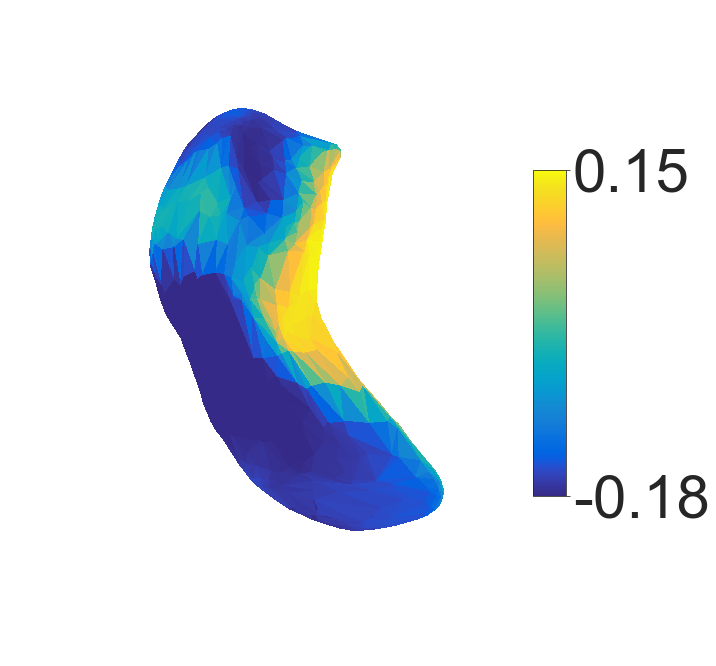

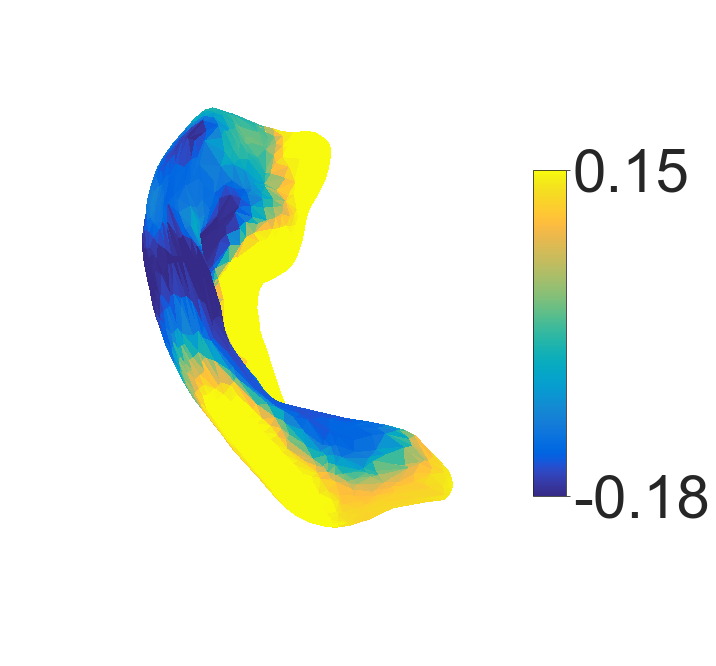

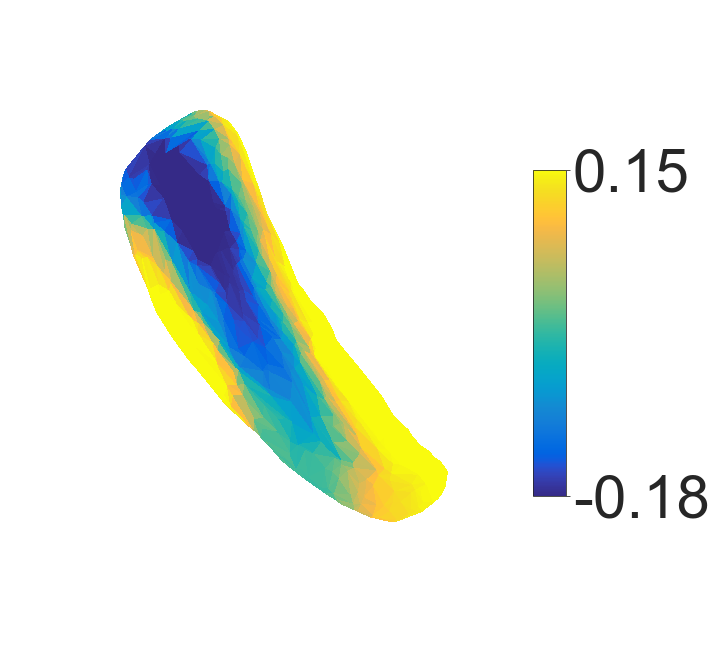

In [3]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                   plot_funcs.yLSUB, 
                                   plot_funcs.zLSUB, 
                                   plot_funcs.triLSUB, 
                                   G1_fus_LSUB,
                                   plot_funcs.parula_cmap(),
                                   -0.18, 0.15)

fig2 = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                   plot_funcs.yLCA, 
                                   plot_funcs.zLCA, 
                                   plot_funcs.triLCA, 
                                   G1_fus_LCA,
                                   plot_funcs.parula_cmap(),
                                   -0.18, 0.15)

fig3 = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                   plot_funcs.yLDG, 
                                   plot_funcs.zLDG, 
                                   plot_funcs.triLDG, 
                                   G1_fus_LDG,
                                   plot_funcs.parula_cmap(),
                                   -0.18, 0.15)

#fig1.savefig('../figures/fusion_G1_LSUB.svg', dpi=200)
#fig2.savefig('../figures/fusion_G1_LCA.svg', dpi=200)
#fig3.savefig('../figures/fusion_G1_LDG.svg', dpi=200)

## G2 (fus)

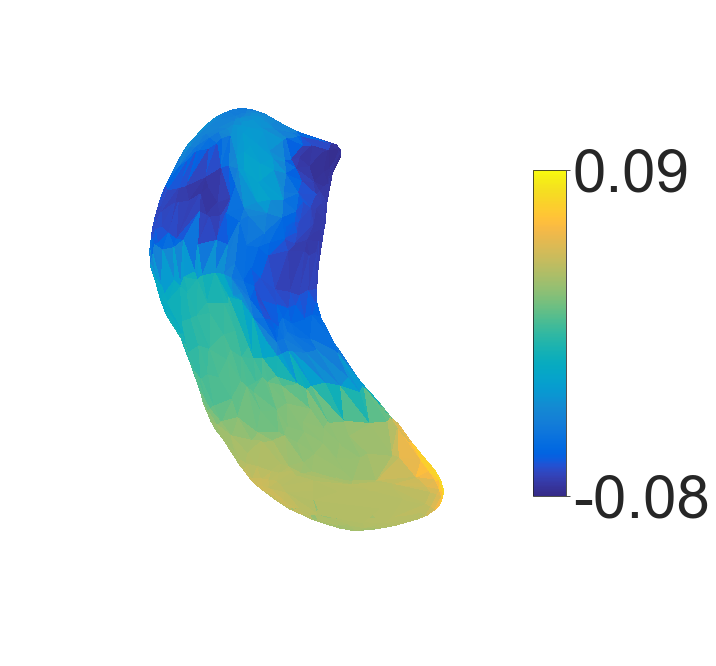

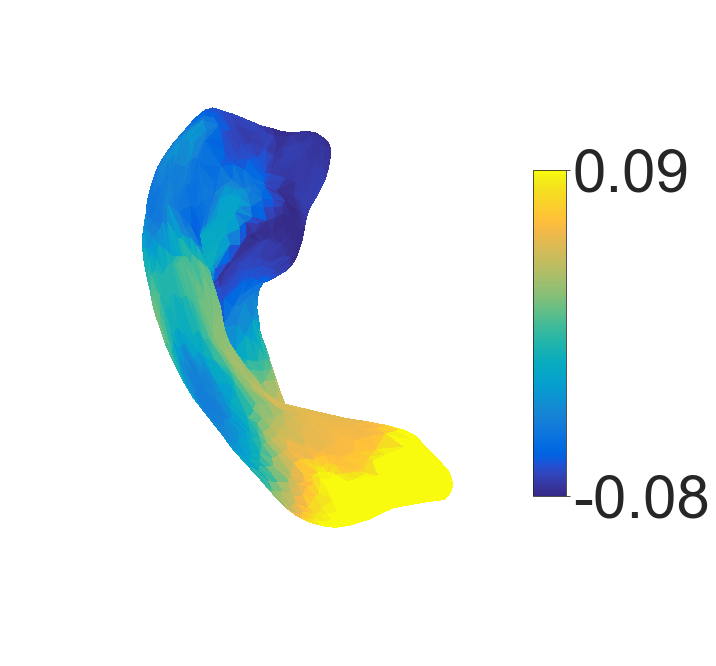

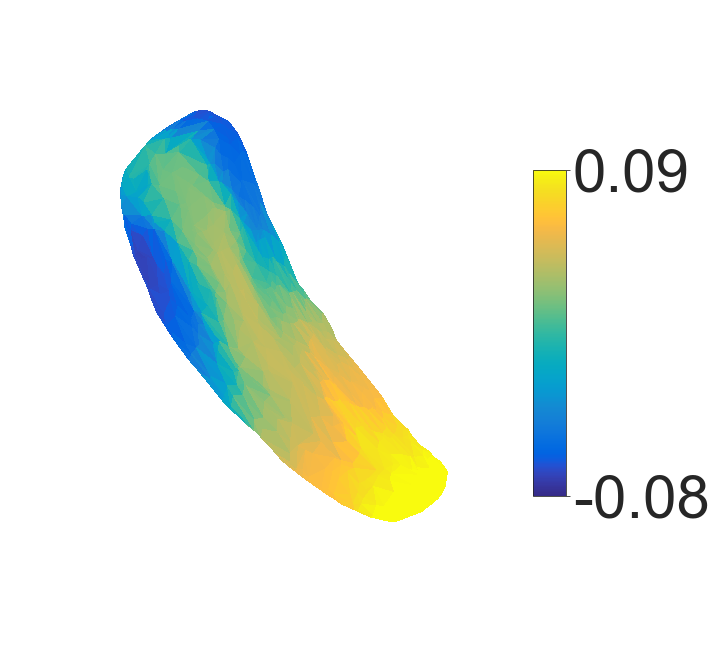

In [4]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                   plot_funcs.yLSUB, 
                                   plot_funcs.zLSUB, 
                                   plot_funcs.triLSUB, 
                                   G2_fus_LSUB,
                                   plot_funcs.parula_cmap(),
                                   -0.08, 0.09)

fig2 = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                   plot_funcs.yLCA, 
                                   plot_funcs.zLCA, 
                                   plot_funcs.triLCA, 
                                   G2_fus_LCA,
                                   plot_funcs.parula_cmap(),
                                   -0.08, 0.09)

fig3 = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                   plot_funcs.yLDG, 
                                   plot_funcs.zLDG, 
                                   plot_funcs.triLDG, 
                                   G2_fus_LDG,
                                   plot_funcs.parula_cmap(),
                                   -0.08, 0.09)

#fig1.savefig('../figures/fusion_G2_LSUB.svg', dpi=200)
#fig2.savefig('../figures/fusion_G2_LCA.svg', dpi=200)
#fig3.savefig('../figures/fusion_G2_LDG.svg', dpi=200)

## read-in and plot coupling maps

In [5]:
ddir = '../data/tout_group/'
 
h  = h5py.File(os.path.join(ddir, 'Hmean709_coupling_left.h5'), 'r');
data = np.array(h['data'])

r_lsub = data[0:1024,]
r_lca  = data[1024:1024+2048,]
r_ldg  = data[1024+2048:1024+2048+1024,]



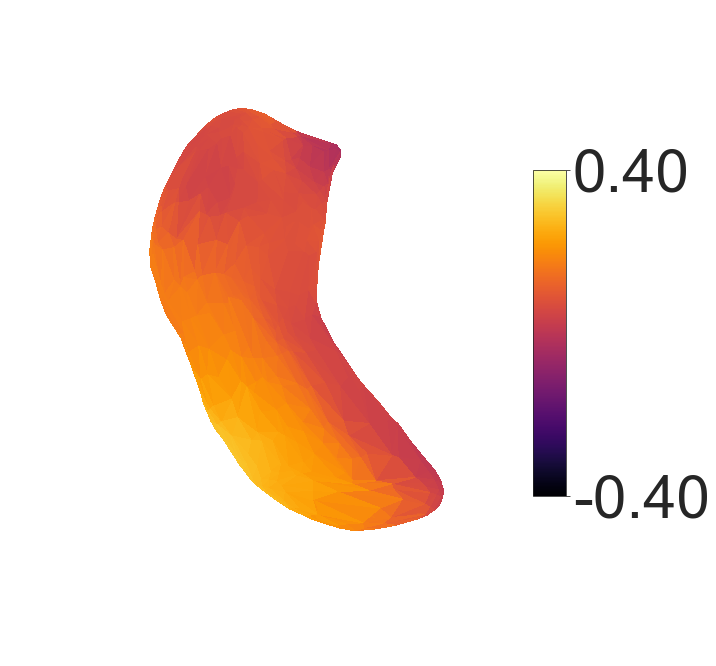

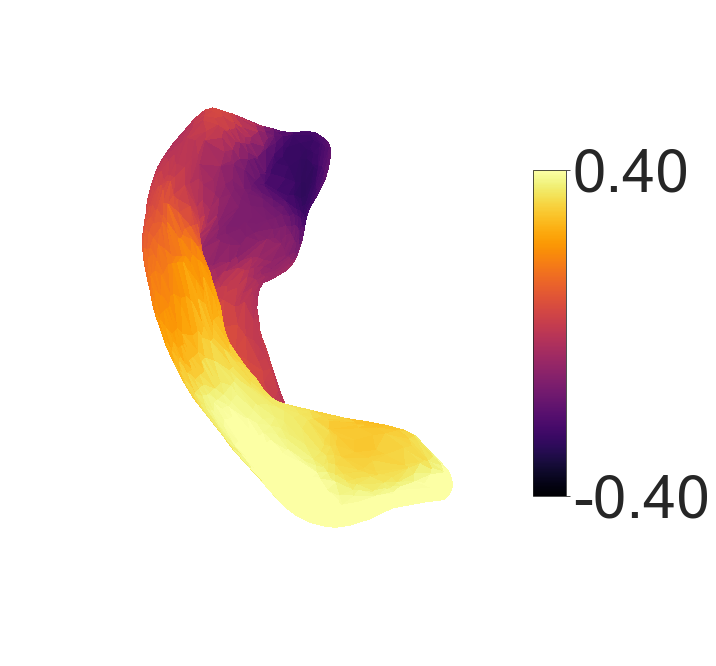

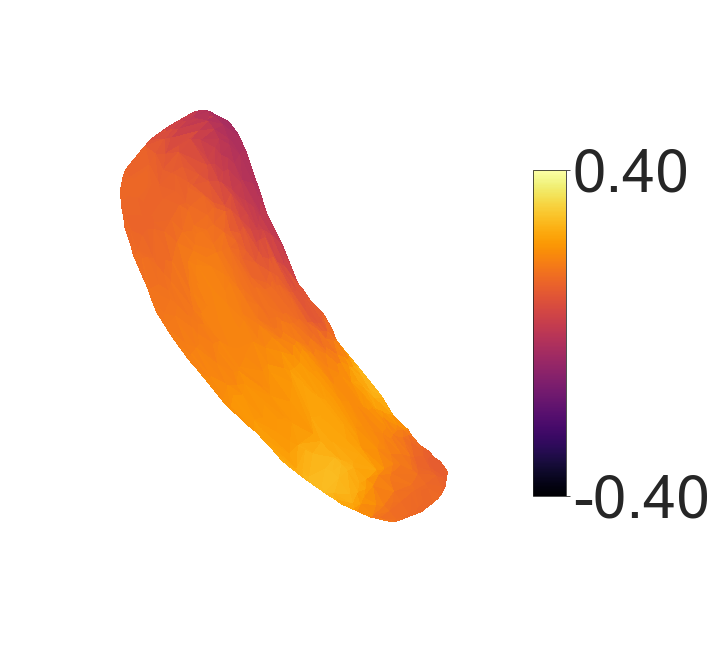

In [6]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB,
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  r_lsub, 
                                  'inferno', -0.4, 0.4)

fig2 = plot_funcs.plot_surf_upper2(plot_funcs.xLCA,
                                  plot_funcs.yLCA, 
                                  plot_funcs.zLCA, 
                                  plot_funcs.triLCA, 
                                  r_lca, 
                                  'inferno', -0.4, 0.4)

fig3 = plot_funcs.plot_surf_upper2(plot_funcs.xLDG,
                                  plot_funcs.yLDG, 
                                  plot_funcs.zLDG, 
                                  plot_funcs.triLDG, 
                                  r_ldg, 
                                  'inferno', -0.4, 0.4)

#fig1.savefig('../figures/rcorr_meanSCOVFC_lsub.svg', dpi=300)
#fig2.savefig('../figures/rcorr_meanSCOVFC_lca.svg',dpi=300)
#fig3.savefig('../figures/rcorr_meanSCOVFC_ldg.svg',dpi=300)


## associations between individual gradients

### load gradients of structural intensity covariance

In [7]:
outdir = '../data/tout_group/'

h = h5py.File(os.path.join(outdir, 'Hmean709scovGradients_left.h5'), 'r')
data = np.array(h['data']).T

G1_sic_LSUB = data[0:1024,0]
G1_sic_LCA  = data[1024:1024+2048,0]
G1_sic_LDG  = data[1024+2048:1024+2048+1024,0] 

G2_sic_LSUB = data[0:1024,1]
G2_sic_LCA  = data[1024:1024+2048,1]
G2_sic_LDG  = data[1024+2048:1024+2048+1024,1] 


### get fcon gradients

In [8]:
ddir = '../data/tout_group/'

# read-in primary and secongardy gradients (G1 & G2) for individual subfields
h1  = h5py.File(os.path.join(ddir, 'Hmean709connGradients_left.h5'), 'r');

G1_fc_LSUB = np.array(h1['gradients_'][0:1024,0])
G1_fc_LCA = np.array(h1['gradients_'][1024:1024+2048,0])
G1_fc_LDG = np.array(h1['gradients_'][1024+2048:1024+2048+1024,0])

G2_fc_LSUB = np.array(h1['gradients_'][0:1024,1])
G2_fc_LCA = np.array(h1['gradients_'][1024:1024+2048,1])
G2_fc_LDG = np.array(h1['gradients_'][1024+2048:1024+2048+1024,1])


### get gradients of heritability

In [9]:
# read-in data: gradients of fc-heritability for subfields
h = h5py.File('../data/tout_group/Hmean709_FC_herit_gradients_left.h5', 'r')

G1_herit_LSUB = np.array(h['gradients'][0:1024,0])
G1_herit_LCA = np.array(h['gradients'][1024:1024+2048,0])
G1_herit_LDG = np.array(h['gradients'][1024+2048:1024+2048+1024,0])

G2_herit_LSUB = np.array(h['gradients'][0:1024,1])
G2_herit_LCA = np.array(h['gradients'][1024:1024+2048,1])
G2_herit_LDG = np.array(h['gradients'][1024+2048:1024+2048+1024,1])


### get T1w/T2w maps

In [10]:
h1 = h5py.File('../data/tout_group/H709_t1wt2w_lsub.h5', 'r') 
h2 = h5py.File('../data/tout_group/H709_t1wt2w_lca.h5', 'r') 
h3 = h5py.File('../data/tout_group/H709_t1wt2w_ldg.h5', 'r') 

group_t1wt2w_LSUB = np.array(h1['data']).mean(axis=0)
group_t1wt2w_LCA  = np.array(h2['data']).mean(axis=0)
group_t1wt2w_LDG  = np.array(h3['data']).mean(axis=0)


print(group_t1wt2w_LSUB.min(), group_t1wt2w_LSUB.max())
print(group_t1wt2w_LCA.min(), group_t1wt2w_LCA.max())
print(group_t1wt2w_LDG.min(), group_t1wt2w_LDG.max())

1.6893644349699464 2.5238820378299494
1.5745954634608603 3.59316311400431
1.5941865649310758 1.7227601688906908


### get GEN gradients

In [11]:
g = h5py.File(os.path.join(outdir, 'Hmean709genGradients_left.h5'), 'r')
data = np.array(g['data']).T


G1_gen_LSUB = data[0:1024,0]
G1_gen_LCA  = data[1024:1024+2048,0]
G1_gen_LDG  = data[1024+2048:1024+2048+1024,0] 

G2_gen_LSUB = data[0:1024,1]
G2_gen_LCA  = data[1024:1024+2048,1]
G2_gen_LDG  = data[1024+2048:1024+2048+1024,1] 


In [12]:
G1_gen_LSUB.shape

(1024,)

### get FUSED gradients

In [13]:
g = h5py.File('../data/tout_group/Hmean709fusedGradients_left.h5', 'r')
data = np.array(g['data'])

G1_fus_LSUB = data[0:1024,0]
G1_fus_LCA  = data[1024:1024+2048,0]
G1_fus_LDG  = data[1024+2048:1024+2048+1024,0] 

G2_fus_LSUB = data[0:1024,1]
G2_fus_LCA  = data[1024:1024+2048,1]
G2_fus_LDG  = data[1024+2048:1024+2048+1024,1] 


In [14]:
G1_fus_LSUB.shape

(1024,)

## get COUPLING maps

In [15]:
g = h5py.File('../data/tout_group/Hmean709_coupling_left.h5', 'r')
data = np.array(g['data'])

r_LSUB = data[0:1024]
r_LCA  = data[1024:1024+2048]
r_LDG  = data[1024+2048:1024+2048+1024] 

## generate data frame

In [16]:
corrlist = ['g1_fc', #A-P
            'g2_her',
            'g1_sic',
            'g1_gen',
            'g2_fus',
            'coup',

            'g2_fc', #M-L
            't1wt2',
            'g2_sic',
            'g1_fus',
            'g2_gen',
            'g1_her', 
               ]

df = pd.DataFrame(index = corrlist, columns = corrlist)


### define a function to compute the R^2 (coefficient of determination)

In [17]:
import numpy

# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = numpy.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = numpy.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = numpy.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = numpy.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = numpy.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

# SUB

In [18]:
#df.loc['g1_fc']['g1_fc'] = polyfit(G1_fc_LSUB, G1_fc_LSUB, 1)['determination']
df.loc['g1_fc']['g2_her'] = polyfit(G1_fc_LSUB, G2_herit_LSUB, 1)['determination']
df.loc['g1_fc']['g1_sic'] = polyfit(G1_fc_LSUB, G1_sic_LSUB, 1)['determination']
df.loc['g1_fc']['g1_gen'] = polyfit(G1_fc_LSUB, G1_gen_LSUB, 1)['determination']
df.loc['g1_fc']['g2_fus'] = polyfit(G1_fc_LSUB, G2_fus_LSUB, 1)['determination']
df.loc['g1_fc']['coup'] = polyfit(G1_fc_LSUB, r_LSUB, 1)['determination']
df.loc['g1_fc']['g2_fc'] = polyfit(G1_fc_LSUB, G2_fc_LSUB, 1)['determination']
df.loc['g1_fc']['t1wt2'] = polyfit(G1_fc_LSUB, np.log(group_t1wt2w_LSUB), 1)['determination']
df.loc['g1_fc']['g2_sic'] = polyfit(G1_fc_LSUB, G2_sic_LSUB, 1)['determination']
df.loc['g1_fc']['g1_fus'] = polyfit(G1_fc_LSUB, G1_fus_LSUB, 1)['determination']
df.loc['g1_fc']['g2_gen'] = polyfit(G1_fc_LSUB, G2_gen_LSUB, 1)['determination']
df.loc['g1_fc']['g1_her'] = polyfit(G1_fc_LSUB, G1_herit_LSUB, 1)['determination']

df.loc['g2_her']['g1_fc'] = polyfit(G2_herit_LSUB, G1_fc_LSUB, 1)['determination']
#df.loc['g2_her']['g2_her'] = polyfit(G2_herit_LSUB, G2_herit__LSUB, 1)['determination']
df.loc['g2_her']['g1_sic'] = polyfit(G2_herit_LSUB, G1_sic_LSUB, 1)['determination']
df.loc['g2_her']['g1_gen'] = polyfit(G2_herit_LSUB, G1_gen_LSUB, 1)['determination']
df.loc['g2_her']['g2_fus'] = polyfit(G2_herit_LSUB, G2_fus_LSUB, 1)['determination']
df.loc['g2_her']['coup'] = polyfit(G2_herit_LSUB, r_LSUB, 1)['determination']
df.loc['g2_her']['g2_fc'] = polyfit(G2_herit_LSUB, G2_fc_LSUB, 1)['determination']
df.loc['g2_her']['t1wt2'] = polyfit(G2_herit_LSUB, np.log(group_t1wt2w_LSUB), 1)['determination']
df.loc['g2_her']['g2_sic'] = polyfit(G2_herit_LSUB, G2_sic_LSUB, 1)['determination']
df.loc['g2_her']['g1_fus'] = polyfit(G2_herit_LSUB, G1_fus_LSUB, 1)['determination']
df.loc['g2_her']['g2_gen'] = polyfit(G2_herit_LSUB, G2_gen_LSUB, 1)['determination']
df.loc['g2_her']['g1_her'] = polyfit(G2_herit_LSUB, G1_herit_LSUB, 1)['determination']

#df

df.loc['g1_sic']['g1_fc'] = polyfit(G1_sic_LSUB, G1_fc_LSUB, 1)['determination']
df.loc['g1_sic']['g2_her'] = polyfit(G1_sic_LSUB, G2_herit_LSUB, 1)['determination']
#df.loc['g1_sic']['g1_sic'] = polyfit(G1_sic_LSUB, G1_sic_LSUB, 1)['determination']
df.loc['g1_sic']['g1_gen'] = polyfit(G1_sic_LSUB, G1_gen_LSUB, 1)['determination']
df.loc['g1_sic']['g2_fus'] = polyfit(G1_sic_LSUB, G2_fus_LSUB, 1)['determination']
df.loc['g1_sic']['coup'] = polyfit(G1_sic_LSUB, r_LSUB, 1)['determination']
df.loc['g1_sic']['g2_fc'] = polyfit(G1_sic_LSUB, G2_fc_LSUB, 1)['determination']
df.loc['g1_sic']['t1wt2'] = polyfit(G1_sic_LSUB, np.log(group_t1wt2w_LSUB), 1)['determination']
df.loc['g1_sic']['g2_sic'] = polyfit(G1_sic_LSUB, G2_sic_LSUB, 1)['determination']
df.loc['g1_sic']['g1_fus'] = polyfit(G1_sic_LSUB, G1_fus_LSUB, 1)['determination']
df.loc['g1_sic']['g2_gen'] = polyfit(G1_sic_LSUB, G2_gen_LSUB, 1)['determination']
df.loc['g1_sic']['g1_her'] = polyfit(G1_sic_LSUB, G1_herit_LSUB, 1)['determination']

#df
df.loc['g1_gen']['g1_fc'] = polyfit(G1_gen_LSUB, G1_fc_LSUB, 1)['determination']
df.loc['g1_gen']['g2_her'] = polyfit(G1_gen_LSUB, G2_herit_LSUB, 1)['determination']
df.loc['g1_gen']['g1_sic'] = polyfit(G1_gen_LSUB, G1_sic_LSUB, 1)['determination']
#df.loc['g1_gen']['g1_gen'] = polyfit(G1_gen_LSUB, G1_gen_LSUB, 1)['determination']
df.loc['g1_gen']['g2_fus'] = polyfit(G1_gen_LSUB, G2_fus_LSUB, 1)['determination']
df.loc['g1_gen']['coup'] = polyfit(G1_gen_LSUB, r_LSUB, 1)['determination']
df.loc['g1_gen']['g2_fc'] = polyfit(G1_gen_LSUB, G2_fc_LSUB, 1)['determination']
df.loc['g1_gen']['t1wt2'] = polyfit(G1_gen_LSUB, np.log(group_t1wt2w_LSUB), 1)['determination']
df.loc['g1_gen']['g2_sic'] = polyfit(G1_gen_LSUB, G2_sic_LSUB, 1)['determination']
df.loc['g1_gen']['g1_fus'] = polyfit(G1_gen_LSUB, G1_fus_LSUB, 1)['determination']
df.loc['g1_gen']['g2_gen'] = polyfit(G1_gen_LSUB, G2_gen_LSUB, 1)['determination']
df.loc['g1_gen']['g1_her'] = polyfit(G1_gen_LSUB, G1_herit_LSUB, 1)['determination']


#df

df.loc['g2_fus']['g1_fc'] = polyfit(G2_fus_LSUB, G1_fc_LSUB, 1)['determination']
df.loc['g2_fus']['g2_her'] = polyfit(G2_fus_LSUB, G2_herit_LSUB, 1)['determination']
df.loc['g2_fus']['g1_sic'] = polyfit(G2_fus_LSUB, G1_sic_LSUB, 1)['determination']
df.loc['g2_fus']['g1_gen'] = polyfit(G2_fus_LSUB, G1_gen_LSUB, 1)['determination']
#df.loc['g2_fus']['g2_fus'] = polyfit(G2_fus_LSUB, G2_fus_LSUB, 1)['determination']
df.loc['g2_fus']['coup'] = polyfit(G2_fus_LSUB, r_LSUB, 1)['determination']
df.loc['g2_fus']['g2_fc'] = polyfit(G2_fus_LSUB, G2_fc_LSUB, 1)['determination']
df.loc['g2_fus']['t1wt2'] = polyfit(G2_fus_LSUB, np.log(group_t1wt2w_LSUB), 1)['determination']
df.loc['g2_fus']['g2_sic'] = polyfit(G2_fus_LSUB, G2_sic_LSUB, 1)['determination']
df.loc['g2_fus']['g1_fus'] = polyfit(G2_fus_LSUB, G1_fus_LSUB, 1)['determination']
df.loc['g2_fus']['g2_gen'] = polyfit(G2_fus_LSUB, G2_gen_LSUB, 1)['determination']
df.loc['g2_fus']['g1_her'] = polyfit(G2_fus_LSUB, G1_herit_LSUB, 1)['determination']

#df
df.loc['coup']['g1_fc'] = polyfit(r_LSUB, G1_fc_LSUB, 1)['determination']
df.loc['coup']['g2_her'] = polyfit(r_LSUB, G2_herit_LSUB, 1)['determination']
df.loc['coup']['g1_sic'] = polyfit(r_LSUB, G1_sic_LSUB, 1)['determination']
df.loc['coup']['g1_gen'] = polyfit(r_LSUB, G1_gen_LSUB, 1)['determination']
df.loc['coup']['g2_fus'] = polyfit(r_LSUB, G2_fus_LSUB, 1)['determination']
#df.loc['coup']['coup'] = polyfit(r_LSUB, r_LSUB, 1)['determination']
df.loc['coup']['g2_fc'] = polyfit(r_LSUB, G2_fc_LSUB, 1)['determination']
df.loc['coup']['t1wt2'] = polyfit(r_LSUB, np.log(group_t1wt2w_LSUB), 1)['determination']
df.loc['coup']['g2_sic'] = polyfit(r_LSUB, G2_sic_LSUB, 1)['determination']
df.loc['coup']['g1_fus'] = polyfit(r_LSUB, G1_fus_LSUB, 1)['determination']
df.loc['coup']['g2_gen'] = polyfit(r_LSUB, G2_gen_LSUB, 1)['determination']
df.loc['coup']['g1_her'] = polyfit(r_LSUB, G1_herit_LSUB, 1)['determination']

#df
df.loc['g2_fc']['g1_fc'] = polyfit(G2_fc_LSUB, G1_fc_LSUB, 1)['determination']
df.loc['g2_fc']['g2_her'] = polyfit(G2_fc_LSUB, G2_herit_LSUB, 1)['determination']
df.loc['g2_fc']['g1_sic'] = polyfit(G2_fc_LSUB, G1_sic_LSUB, 1)['determination']
df.loc['g2_fc']['g1_gen'] = polyfit(G2_fc_LSUB, G1_gen_LSUB, 1)['determination']
df.loc['g2_fc']['g2_fus'] = polyfit(G2_fc_LSUB, G2_fus_LSUB, 1)['determination']
df.loc['g2_fc']['coup'] = polyfit(G2_fc_LSUB, r_LSUB, 1)['determination']
#df.loc['g2_fc']['g2_fc'] = polyfit(G2_fc_LSUB, G2_fc_LSUB, 1)['determination']
df.loc['g2_fc']['t1wt2'] = polyfit(G2_fc_LSUB, np.log(group_t1wt2w_LSUB), 1)['determination']
df.loc['g2_fc']['g2_sic'] = polyfit(G2_fc_LSUB, G2_sic_LSUB, 1)['determination']
df.loc['g2_fc']['g1_fus'] = polyfit(G2_fc_LSUB, G1_fus_LSUB, 1)['determination']
df.loc['g2_fc']['g2_gen'] = polyfit(G2_fc_LSUB, G2_gen_LSUB, 1)['determination']
df.loc['g2_fc']['g1_her'] = polyfit(G2_fc_LSUB, G1_herit_LSUB, 1)['determination']


#df
df.loc['t1wt2']['g1_fc'] = polyfit(np.log(group_t1wt2w_LSUB), G1_fc_LSUB, 1)['determination']
df.loc['t1wt2']['g2_her'] = polyfit(np.log(group_t1wt2w_LSUB), G2_herit_LSUB, 1)['determination']
df.loc['t1wt2']['g1_sic'] = polyfit(np.log(group_t1wt2w_LSUB), G1_sic_LSUB, 1)['determination']
df.loc['t1wt2']['g1_gen'] = polyfit(np.log(group_t1wt2w_LSUB), G1_gen_LSUB, 1)['determination']
df.loc['t1wt2']['g2_fus'] = polyfit(np.log(group_t1wt2w_LSUB), G2_fus_LSUB, 1)['determination']
df.loc['t1wt2']['coup'] = polyfit(np.log(group_t1wt2w_LSUB), r_LSUB, 1)['determination']
df.loc['t1wt2']['g2_fc'] = polyfit(np.log(group_t1wt2w_LSUB), G2_fc_LSUB, 1)['determination']
#df.loc['t1wt2']['t1wt2'] = polyfit(np.log(group_t1wt2w_LSUB, 1)['determination'], np.log(group_t1wt2w_LSUB), 1)['determination']
df.loc['t1wt2']['g2_sic'] = polyfit(np.log(group_t1wt2w_LSUB), G2_sic_LSUB, 1)['determination']
df.loc['t1wt2']['g1_fus'] = polyfit(np.log(group_t1wt2w_LSUB), G1_fus_LSUB, 1)['determination']
df.loc['t1wt2']['g2_gen'] = polyfit(np.log(group_t1wt2w_LSUB), G2_gen_LSUB, 1)['determination']
df.loc['t1wt2']['g1_her'] = polyfit(np.log(group_t1wt2w_LSUB), G1_herit_LSUB, 1)['determination']


#df
df.loc['g2_sic']['g1_fc'] = polyfit(G2_sic_LSUB, G1_fc_LSUB, 1)['determination']
df.loc['g2_sic']['g2_her'] = polyfit(G2_sic_LSUB, G2_herit_LSUB, 1)['determination']
df.loc['g2_sic']['g1_sic'] = polyfit(G2_sic_LSUB, G1_sic_LSUB, 1)['determination']
df.loc['g2_sic']['g1_gen'] = polyfit(G2_sic_LSUB, G1_gen_LSUB, 1)['determination']
df.loc['g2_sic']['g2_fus'] = polyfit(G2_sic_LSUB, G2_fus_LSUB, 1)['determination']
df.loc['g2_sic']['coup'] = polyfit(G2_sic_LSUB, r_LSUB, 1)['determination']
df.loc['g2_sic']['g2_fc'] = polyfit(G2_sic_LSUB, G2_fc_LSUB, 1)['determination']
df.loc['g2_sic']['t1wt2'] = polyfit(G2_sic_LSUB, np.log(group_t1wt2w_LSUB), 1)['determination']
#df.loc['g2_sic']['g2_sic'] = polyfit(G2_sic_LSUB, G2_sic_LSUB, 1)['determination']
df.loc['g2_sic']['g1_fus'] = polyfit(G2_sic_LSUB, G1_fus_LSUB, 1)['determination']
df.loc['g2_sic']['g2_gen'] = polyfit(G2_sic_LSUB, G2_gen_LSUB, 1)['determination']
df.loc['g2_sic']['g1_her'] = polyfit(G2_sic_LSUB, G1_herit_LSUB, 1)['determination']


#df
df.loc['g1_fus']['g1_fc'] = polyfit(G1_fus_LSUB, G1_fc_LSUB, 1)['determination']
df.loc['g1_fus']['g2_her'] = polyfit(G1_fus_LSUB, G2_herit_LSUB, 1)['determination']
df.loc['g1_fus']['g1_sic'] = polyfit(G1_fus_LSUB, G1_sic_LSUB, 1)['determination']
df.loc['g1_fus']['g1_gen'] = polyfit(G1_fus_LSUB, G1_gen_LSUB, 1)['determination']
df.loc['g1_fus']['g2_fus'] = polyfit(G1_fus_LSUB, G2_fus_LSUB, 1)['determination']
df.loc['g1_fus']['coup'] = polyfit(G1_fus_LSUB, r_LSUB, 1)['determination']
df.loc['g1_fus']['g2_fc'] = polyfit(G1_fus_LSUB, G2_fc_LSUB, 1)['determination']
df.loc['g1_fus']['t1wt2'] = polyfit(G1_fus_LSUB, np.log(group_t1wt2w_LSUB), 1)['determination']
df.loc['g1_fus']['g2_sic'] = polyfit(G1_fus_LSUB, G2_sic_LSUB, 1)['determination']
#df.loc['g1_fus']['g1_fus'] = polyfit(G1_fus_LSUB, G1_fus_LSUB, 1)['determination']
df.loc['g1_fus']['g2_gen'] = polyfit(G1_fus_LSUB, G2_gen_LSUB, 1)['determination']
df.loc['g1_fus']['g1_her'] = polyfit(G1_fus_LSUB, G1_herit_LSUB, 1)['determination']


df.loc['g2_gen']['g1_fc'] = polyfit(G2_gen_LSUB, G1_fc_LSUB, 1)['determination']
df.loc['g2_gen']['g2_her'] = polyfit(G2_gen_LSUB, G2_herit_LSUB, 1)['determination']
df.loc['g2_gen']['g1_sic'] = polyfit(G2_gen_LSUB, G1_sic_LSUB, 1)['determination']
df.loc['g2_gen']['g1_gen'] = polyfit(G2_gen_LSUB, G1_gen_LSUB, 1)['determination']
df.loc['g2_gen']['g2_fus'] = polyfit(G2_gen_LSUB, G2_fus_LSUB, 1)['determination']
df.loc['g2_gen']['coup'] = polyfit(G2_gen_LSUB, r_LSUB, 1)['determination']
df.loc['g2_gen']['g2_fc'] = polyfit(G2_gen_LSUB, G2_fc_LSUB, 1)['determination']
df.loc['g2_gen']['t1wt2'] = polyfit(G2_gen_LSUB, np.log(group_t1wt2w_LSUB), 1)['determination']
df.loc['g2_gen']['g2_sic'] = polyfit(G2_gen_LSUB, G2_sic_LSUB, 1)['determination']
df.loc['g2_gen']['g1_fus'] = polyfit(G2_gen_LSUB, G1_fus_LSUB, 1)['determination']
#df.loc['g2_gen']['g2_gen'] = polyfit(G2_gen_LSUB, G2_gen_LSUB, 1)['determination']
df.loc['g2_gen']['g1_her'] = polyfit(G2_gen_LSUB, G1_herit_LSUB, 1)['determination']


#df
df.loc['g1_her']['g1_fc'] = polyfit(G1_herit_LSUB, G1_fc_LSUB, 1)['determination']
df.loc['g1_her']['g2_her'] = polyfit(G1_herit_LSUB, G2_herit_LSUB, 1)['determination']
df.loc['g1_her']['g1_sic'] = polyfit(G1_herit_LSUB, G1_sic_LSUB, 1)['determination']
df.loc['g1_her']['g1_gen'] = polyfit(G1_herit_LSUB, G1_gen_LSUB, 1)['determination']
df.loc['g1_her']['g2_fus'] = polyfit(G1_herit_LSUB, G2_fus_LSUB, 1)['determination']
df.loc['g1_her']['coup'] = polyfit(G1_herit_LSUB, r_LSUB, 1)['determination']
df.loc['g1_her']['g2_fc'] = polyfit(G1_herit_LSUB, G2_fc_LSUB, 1)['determination']
df.loc['g1_her']['t1wt2'] = polyfit(G1_herit_LSUB, np.log(group_t1wt2w_LSUB), 1)['determination']
df.loc['g1_her']['g2_sic'] = polyfit(G1_herit_LSUB, G2_sic_LSUB, 1)['determination']
df.loc['g1_her']['g1_fus'] = polyfit(G1_herit_LSUB, G1_fus_LSUB, 1)['determination']
df.loc['g1_her']['g2_gen'] = polyfit(G1_herit_LSUB, G2_gen_LSUB, 1)['determination']
#df.loc['g1_her']['g1_her'] = polyfit(G1_herit_LSUB, G1_herit_LSUB, 1)['determination']


In [19]:
df

,g1_fc,g2_her,g1_sic,g1_gen,g2_fus,coup,g2_fc,t1wt2,g2_sic,g1_fus,g2_gen,g1_her
g1_fc,NaN,0.734149,0.777155,0.450475,0.783251,0.118001,0.0759175,0.0391454,0.565111,0.0864796,0.000210785,0.00475802
g2_her,0.734149,NaN,0.600386,0.465199,0.541654,0.00406569,0.247095,0.170617,0.442426,0.0145027,0.0124772,7.13916e-10
g1_sic,0.777155,0.600386,NaN,0.575925,0.532615,0.05799,0.20633,0.145686,0.726121,0.00704636,0.0569221,0.0240347
g1_gen,0.450475,0.465199,0.575925,NaN,0.26125,0.0926593,0.0893119,0.102891,0.655874,0.0235699,0.000597382,0.0125055
g2_fus,0.783251,0.541654,0.532615,0.26125,NaN,0.210433,0.0142584,0.00188391,0.308847,0.302047,0.00954815,0.00257629
coup,0.118001,0.00406569,0.05799,0.0926593,0.210433,NaN,0.349021,0.35143,0.0526798,0.253292,0.00639065,0.0005784
g2_fc,0.0759175,0.247095,0.20633,0.0893119,0.0142584,0.349021,NaN,0.856833,0.129301,0.212102,0.000261206,0.0162377
t1wt2,0.0391454,0.170617,0.145686,0.102891,0.00188391,0.35143,0.856833,NaN,0.136926,0.225485,0.00390686,0.00823601
g2_sic,0.565111,0.442426,0.726121,0.655874,0.308847,0.0526798,0.129301,0.136926,NaN,0.0154456,0.000180571,0.0235309
g1_fus,0.0864796,0.0145027,0.00704636,0.0235699,0.302047,0.253292,0.212102,0.225485,0.0154456,NaN,0.17711,0.0566215


In [20]:
## check the symmetry
DF_LSUB = df.copy()
A = DF_LSUB.values.astype(float)
np.allclose(A, A.T, equal_nan=True)

True

In [21]:
B = A.copy()
    
DF= pd.DataFrame(index = corrlist,
                 columns = corrlist,
                 data = B)  

DF.min().min(), DF.max().max()


(7.139163510955532e-10, 0.8568329733798669)

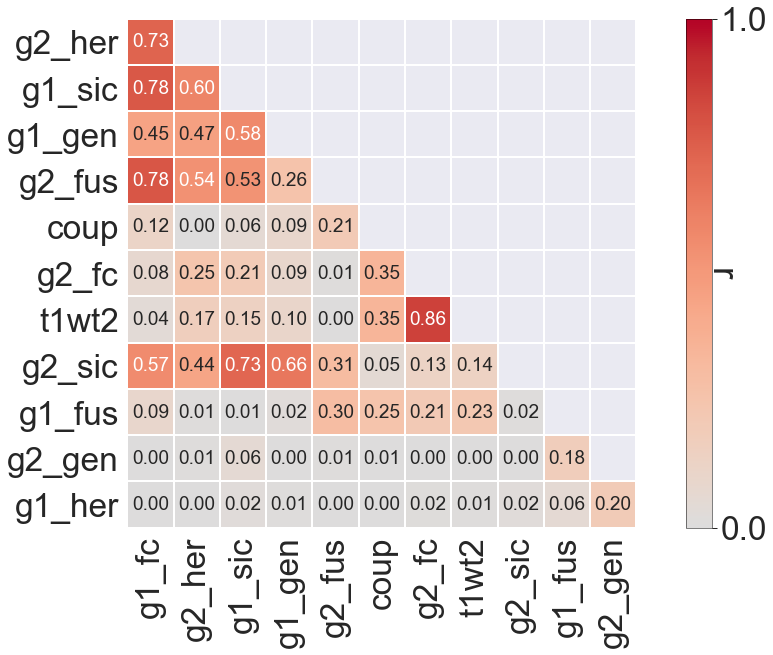

In [22]:
f = plot_sorted_df(DF, 
                   corrlist,
                   thr = 0,
                   vmax = 1,
                   )

#plt.savefig('../figures/heatmap_LSUB_rsquared.svg',dpi=300)

# CA 

In [23]:
corrlist = ['g1_fc', #A-P
            'g2_her',
            'g1_sic',
            'g1_gen',
            'g2_fus',
            'coup',
            
            'g2_fc', #M-L
            't1wt2',
            'g2_sic',
            'g1_fus',
            'g2_gen',
            'g1_her', 
               ]

df = pd.DataFrame(index = corrlist, columns = corrlist)


In [24]:
#df.loc['g1_fc']['g1_fc'] = polyfit(G1_fc_LCA, G1_fc_LCA, 1)['determination']
df.loc['g1_fc']['g2_her'] = polyfit(G1_fc_LCA, G2_herit_LCA, 1)['determination']
df.loc['g1_fc']['g1_sic'] = polyfit(G1_fc_LCA, G1_sic_LCA, 1)['determination']
df.loc['g1_fc']['g1_gen'] = polyfit(G1_fc_LCA, G1_gen_LCA, 1)['determination']
df.loc['g1_fc']['g2_fus'] = polyfit(G1_fc_LCA, G2_fus_LCA, 1)['determination']
df.loc['g1_fc']['coup'] = polyfit(G1_fc_LCA, r_LCA, 1)['determination']
df.loc['g1_fc']['g2_fc'] = polyfit(G1_fc_LCA, G2_fc_LCA, 1)['determination']
df.loc['g1_fc']['t1wt2'] = polyfit(G1_fc_LCA, np.log(group_t1wt2w_LCA), 1)['determination']
df.loc['g1_fc']['g2_sic'] = polyfit(G1_fc_LCA, G2_sic_LCA, 1)['determination']
df.loc['g1_fc']['g1_fus'] = polyfit(G1_fc_LCA, G1_fus_LCA, 1)['determination']
df.loc['g1_fc']['g2_gen'] = polyfit(G1_fc_LCA, G2_gen_LCA, 1)['determination']
df.loc['g1_fc']['g1_her'] = polyfit(G1_fc_LCA, G1_herit_LCA, 1)['determination']

df.loc['g2_her']['g1_fc'] = polyfit(G2_herit_LCA, G1_fc_LCA, 1)['determination']
#df.loc['g2_her']['g2_her'] = polyfit(G2_herit_LCA, G2_herit__LCA, 1)['determination']
df.loc['g2_her']['g1_sic'] = polyfit(G2_herit_LCA, G1_sic_LCA, 1)['determination']
df.loc['g2_her']['g1_gen'] = polyfit(G2_herit_LCA, G1_gen_LCA, 1)['determination']
df.loc['g2_her']['g2_fus'] = polyfit(G2_herit_LCA, G2_fus_LCA, 1)['determination']
df.loc['g2_her']['coup'] = polyfit(G2_herit_LCA, r_LCA, 1)['determination']
df.loc['g2_her']['g2_fc'] = polyfit(G2_herit_LCA, G2_fc_LCA, 1)['determination']
df.loc['g2_her']['t1wt2'] = polyfit(G2_herit_LCA, np.log(group_t1wt2w_LCA), 1)['determination']
df.loc['g2_her']['g2_sic'] = polyfit(G2_herit_LCA, G2_sic_LCA, 1)['determination']
df.loc['g2_her']['g1_fus'] = polyfit(G2_herit_LCA, G1_fus_LCA, 1)['determination']
df.loc['g2_her']['g2_gen'] = polyfit(G2_herit_LCA, G2_gen_LCA, 1)['determination']
df.loc['g2_her']['g1_her'] = polyfit(G2_herit_LCA, G1_herit_LCA, 1)['determination']

df.loc['g1_sic']['g1_fc'] = polyfit(G1_sic_LCA, G1_fc_LCA, 1)['determination']
df.loc['g1_sic']['g2_her'] = polyfit(G1_sic_LCA, G2_herit_LCA, 1)['determination']
#df.loc['g1_sic']['g1_sic'] = polyfit(G1_sic_LCA, G1_sic_LCA, 1)['determination']
df.loc['g1_sic']['g1_gen'] = polyfit(G1_sic_LCA, G1_gen_LCA, 1)['determination']
df.loc['g1_sic']['g2_fus'] = polyfit(G1_sic_LCA, G2_fus_LCA, 1)['determination']
df.loc['g1_sic']['coup'] = polyfit(G1_sic_LCA, r_LCA, 1)['determination']
df.loc['g1_sic']['g2_fc'] = polyfit(G1_sic_LCA, G2_fc_LCA, 1)['determination']
df.loc['g1_sic']['t1wt2'] = polyfit(G1_sic_LCA, np.log(group_t1wt2w_LCA), 1)['determination']
df.loc['g1_sic']['g2_sic'] = polyfit(G1_sic_LCA, G2_sic_LCA, 1)['determination']
df.loc['g1_sic']['g1_fus'] = polyfit(G1_sic_LCA, G1_fus_LCA, 1)['determination']
df.loc['g1_sic']['g2_gen'] = polyfit(G1_sic_LCA, G2_gen_LCA, 1)['determination']
df.loc['g1_sic']['g1_her'] = polyfit(G1_sic_LCA, G1_herit_LCA, 1)['determination']


df.loc['g1_gen']['g1_fc'] = polyfit(G1_gen_LCA, G1_fc_LCA, 1)['determination']
df.loc['g1_gen']['g2_her'] = polyfit(G1_gen_LCA, G2_herit_LCA, 1)['determination']
df.loc['g1_gen']['g1_sic'] = polyfit(G1_gen_LCA, G1_sic_LCA, 1)['determination']
#df.loc['g1_gen']['g1_gen'] = polyfit(G1_gen_LCA, G1_gen_LCA, 1)['determination']
df.loc['g1_gen']['g2_fus'] = polyfit(G1_gen_LCA, G2_fus_LCA, 1)['determination']
df.loc['g1_gen']['coup'] = polyfit(G1_gen_LCA, r_LCA, 1)['determination']
df.loc['g1_gen']['g2_fc'] = polyfit(G1_gen_LCA, G2_fc_LCA, 1)['determination']
df.loc['g1_gen']['t1wt2'] = polyfit(G1_gen_LCA, np.log(group_t1wt2w_LCA), 1)['determination']
df.loc['g1_gen']['g2_sic'] = polyfit(G1_gen_LCA, G2_sic_LCA, 1)['determination']
df.loc['g1_gen']['g1_fus'] = polyfit(G1_gen_LCA, G1_fus_LCA, 1)['determination']
df.loc['g1_gen']['g2_gen'] = polyfit(G1_gen_LCA, G2_gen_LCA, 1)['determination']
df.loc['g1_gen']['g1_her'] = polyfit(G1_gen_LCA, G1_herit_LCA, 1)['determination']


df.loc['g2_fus']['g1_fc'] = polyfit(G2_fus_LCA, G1_fc_LCA, 1)['determination']
df.loc['g2_fus']['g2_her'] = polyfit(G2_fus_LCA, G2_herit_LCA, 1)['determination']
df.loc['g2_fus']['g1_sic'] = polyfit(G2_fus_LCA, G1_sic_LCA, 1)['determination']
df.loc['g2_fus']['g1_gen'] = polyfit(G2_fus_LCA, G1_gen_LCA, 1)['determination']
#df.loc['g2_fus']['g2_fus'] = polyfit(G2_fus_LCA, G2_fus_LCA, 1)['determination']
df.loc['g2_fus']['coup'] = polyfit(G2_fus_LCA, r_LCA, 1)['determination']
df.loc['g2_fus']['g2_fc'] = polyfit(G2_fus_LCA, G2_fc_LCA, 1)['determination']
df.loc['g2_fus']['t1wt2'] = polyfit(G2_fus_LCA, np.log(group_t1wt2w_LCA), 1)['determination']
df.loc['g2_fus']['g2_sic'] = polyfit(G2_fus_LCA, G2_sic_LCA, 1)['determination']
df.loc['g2_fus']['g1_fus'] = polyfit(G2_fus_LCA, G1_fus_LCA, 1)['determination']
df.loc['g2_fus']['g2_gen'] = polyfit(G2_fus_LCA, G2_gen_LCA, 1)['determination']
df.loc['g2_fus']['g1_her'] = polyfit(G2_fus_LCA, G1_herit_LCA, 1)['determination']


df.loc['coup']['g1_fc'] = polyfit(r_LCA, G1_fc_LCA, 1)['determination']
df.loc['coup']['g2_her'] = polyfit(r_LCA, G2_herit_LCA, 1)['determination']
df.loc['coup']['g1_sic'] = polyfit(r_LCA, G1_sic_LCA, 1)['determination']
df.loc['coup']['g1_gen'] = polyfit(r_LCA, G1_gen_LCA, 1)['determination']
df.loc['coup']['g2_fus'] = polyfit(r_LCA, G2_fus_LCA, 1)['determination']
#df.loc['coup']['coup'] = polyfit(r_LCA, r_LCA, 1)['determination']
df.loc['coup']['g2_fc'] = polyfit(r_LCA, G2_fc_LCA, 1)['determination']
df.loc['coup']['t1wt2'] = polyfit(r_LCA, np.log(group_t1wt2w_LCA), 1)['determination']
df.loc['coup']['g2_sic'] = polyfit(r_LCA, G2_sic_LCA, 1)['determination']
df.loc['coup']['g1_fus'] = polyfit(r_LCA, G1_fus_LCA, 1)['determination']
df.loc['coup']['g2_gen'] = polyfit(r_LCA, G2_gen_LCA, 1)['determination']
df.loc['coup']['g1_her'] = polyfit(r_LCA, G1_herit_LCA, 1)['determination']

df.loc['g2_fc']['g1_fc'] = polyfit(G2_fc_LCA, G1_fc_LCA, 1)['determination']
df.loc['g2_fc']['g2_her'] = polyfit(G2_fc_LCA, G2_herit_LCA, 1)['determination']
df.loc['g2_fc']['g1_sic'] = polyfit(G2_fc_LCA, G1_sic_LCA, 1)['determination']
df.loc['g2_fc']['g1_gen'] = polyfit(G2_fc_LCA, G1_gen_LCA, 1)['determination']
df.loc['g2_fc']['g2_fus'] = polyfit(G2_fc_LCA, G2_fus_LCA, 1)['determination']
df.loc['g2_fc']['coup'] = polyfit(G2_fc_LCA, r_LCA, 1)['determination']
#df.loc['g2_fc']['g2_fc'] = polyfit(G2_fc_LCA, G2_fc_LCA, 1)['determination']
df.loc['g2_fc']['t1wt2'] = polyfit(G2_fc_LCA, np.log(group_t1wt2w_LCA), 1)['determination']
df.loc['g2_fc']['g2_sic'] = polyfit(G2_fc_LCA, G2_sic_LCA, 1)['determination']
df.loc['g2_fc']['g1_fus'] = polyfit(G2_fc_LCA, G1_fus_LCA, 1)['determination']
df.loc['g2_fc']['g2_gen'] = polyfit(G2_fc_LCA, G2_gen_LCA, 1)['determination']
df.loc['g2_fc']['g1_her'] = polyfit(G2_fc_LCA, G1_herit_LCA, 1)['determination']

df.loc['t1wt2']['g1_fc'] = polyfit(np.log(group_t1wt2w_LCA), G1_fc_LCA, 1)['determination']
df.loc['t1wt2']['g2_her'] = polyfit(np.log(group_t1wt2w_LCA), G2_herit_LCA, 1)['determination']
df.loc['t1wt2']['g1_sic'] = polyfit(np.log(group_t1wt2w_LCA), G1_sic_LCA, 1)['determination']
df.loc['t1wt2']['g1_gen'] = polyfit(np.log(group_t1wt2w_LCA), G1_gen_LCA, 1)['determination']
df.loc['t1wt2']['g2_fus'] = polyfit(np.log(group_t1wt2w_LCA), G2_fus_LCA, 1)['determination']
df.loc['t1wt2']['coup'] = polyfit(np.log(group_t1wt2w_LCA), r_LCA, 1)['determination']
df.loc['t1wt2']['g2_fc'] = polyfit(np.log(group_t1wt2w_LCA), G2_fc_LCA, 1)['determination']
#df.loc['t1wt2']['t1wt2'] = polyfit(np.log(group_t1wt2w_LCA, 1)['determination'], np.log(group_t1wt2w_LCA), 1)['determination']
df.loc['t1wt2']['g2_sic'] = polyfit(np.log(group_t1wt2w_LCA), G2_sic_LCA, 1)['determination']
df.loc['t1wt2']['g1_fus'] = polyfit(np.log(group_t1wt2w_LCA), G1_fus_LCA, 1)['determination']
df.loc['t1wt2']['g2_gen'] = polyfit(np.log(group_t1wt2w_LCA), G2_gen_LCA, 1)['determination']
df.loc['t1wt2']['g1_her'] = polyfit(np.log(group_t1wt2w_LCA), G1_herit_LCA, 1)['determination']

df.loc['g2_sic']['g1_fc'] = polyfit(G2_sic_LCA, G1_fc_LCA, 1)['determination']
df.loc['g2_sic']['g2_her'] = polyfit(G2_sic_LCA, G2_herit_LCA, 1)['determination']
df.loc['g2_sic']['g1_sic'] = polyfit(G2_sic_LCA, G1_sic_LCA, 1)['determination']
df.loc['g2_sic']['g1_gen'] = polyfit(G2_sic_LCA, G1_gen_LCA, 1)['determination']
df.loc['g2_sic']['g2_fus'] = polyfit(G2_sic_LCA, G2_fus_LCA, 1)['determination']
df.loc['g2_sic']['coup'] = polyfit(G2_sic_LCA, r_LCA, 1)['determination']
df.loc['g2_sic']['g2_fc'] = polyfit(G2_sic_LCA, G2_fc_LCA, 1)['determination']
df.loc['g2_sic']['t1wt2'] = polyfit(G2_sic_LCA, np.log(group_t1wt2w_LCA), 1)['determination']
#df.loc['g2_sic']['g2_sic'] = polyfit(G2_sic_LCA, G2_sic_LCA, 1)['determination']
df.loc['g2_sic']['g1_fus'] = polyfit(G2_sic_LCA, G1_fus_LCA, 1)['determination']
df.loc['g2_sic']['g2_gen'] = polyfit(G2_sic_LCA, G2_gen_LCA, 1)['determination']
df.loc['g2_sic']['g1_her'] = polyfit(G2_sic_LCA, G1_herit_LCA, 1)['determination']

df.loc['g1_fus']['g1_fc'] = polyfit(G1_fus_LCA, G1_fc_LCA, 1)['determination']
df.loc['g1_fus']['g2_her'] = polyfit(G1_fus_LCA, G2_herit_LCA, 1)['determination']
df.loc['g1_fus']['g1_sic'] = polyfit(G1_fus_LCA, G1_sic_LCA, 1)['determination']
df.loc['g1_fus']['g1_gen'] = polyfit(G1_fus_LCA, G1_gen_LCA, 1)['determination']
df.loc['g1_fus']['g2_fus'] = polyfit(G1_fus_LCA, G2_fus_LCA, 1)['determination']
df.loc['g1_fus']['coup'] = polyfit(G1_fus_LCA, r_LCA, 1)['determination']
df.loc['g1_fus']['g2_fc'] = polyfit(G1_fus_LCA, G2_fc_LCA, 1)['determination']
df.loc['g1_fus']['t1wt2'] = polyfit(G1_fus_LCA, np.log(group_t1wt2w_LCA), 1)['determination']
df.loc['g1_fus']['g2_sic'] = polyfit(G1_fus_LCA, G2_sic_LCA, 1)['determination']
#df.loc['g1_fus']['g1_fus'] = polyfit(G1_fus_LCA, G1_fus_LCA, 1)['determination']
df.loc['g1_fus']['g2_gen'] = polyfit(G1_fus_LCA, G2_gen_LCA, 1)['determination']
df.loc['g1_fus']['g1_her'] = polyfit(G1_fus_LCA, G1_herit_LCA, 1)['determination']

df.loc['g2_gen']['g1_fc'] = polyfit(G2_gen_LCA, G1_fc_LCA, 1)['determination']
df.loc['g2_gen']['g2_her'] = polyfit(G2_gen_LCA, G2_herit_LCA, 1)['determination']
df.loc['g2_gen']['g1_sic'] = polyfit(G2_gen_LCA, G1_sic_LCA, 1)['determination']
df.loc['g2_gen']['g1_gen'] = polyfit(G2_gen_LCA, G1_gen_LCA, 1)['determination']
df.loc['g2_gen']['g2_fus'] = polyfit(G2_gen_LCA, G2_fus_LCA, 1)['determination']
df.loc['g2_gen']['coup'] = polyfit(G2_gen_LCA, r_LCA, 1)['determination']
df.loc['g2_gen']['g2_fc'] = polyfit(G2_gen_LCA, G2_fc_LCA, 1)['determination']
df.loc['g2_gen']['t1wt2'] = polyfit(G2_gen_LCA, np.log(group_t1wt2w_LCA), 1)['determination']
df.loc['g2_gen']['g2_sic'] = polyfit(G2_gen_LCA, G2_sic_LCA, 1)['determination']
df.loc['g2_gen']['g1_fus'] = polyfit(G2_gen_LCA, G1_fus_LCA, 1)['determination']
#df.loc['g2_gen']['g2_gen'] = polyfit(G2_gen_LCA, G2_gen_LCA, 1)['determination']
df.loc['g2_gen']['g1_her'] = polyfit(G2_gen_LCA, G1_herit_LCA, 1)['determination']

df.loc['g1_her']['g1_fc'] = polyfit(G1_herit_LCA, G1_fc_LCA, 1)['determination']
df.loc['g1_her']['g2_her'] = polyfit(G1_herit_LCA, G2_herit_LCA, 1)['determination']
df.loc['g1_her']['g1_sic'] = polyfit(G1_herit_LCA, G1_sic_LCA, 1)['determination']
df.loc['g1_her']['g1_gen'] = polyfit(G1_herit_LCA, G1_gen_LCA, 1)['determination']
df.loc['g1_her']['g2_fus'] = polyfit(G1_herit_LCA, G2_fus_LCA, 1)['determination']
df.loc['g1_her']['coup'] = polyfit(G1_herit_LCA, r_LCA, 1)['determination']
df.loc['g1_her']['g2_fc'] = polyfit(G1_herit_LCA, G2_fc_LCA, 1)['determination']
df.loc['g1_her']['t1wt2'] = polyfit(G1_herit_LCA, np.log(group_t1wt2w_LCA), 1)['determination']
df.loc['g1_her']['g2_sic'] = polyfit(G1_herit_LCA, G2_sic_LCA, 1)['determination']
df.loc['g1_her']['g1_fus'] = polyfit(G1_herit_LCA, G1_fus_LCA, 1)['determination']
df.loc['g1_her']['g2_gen'] = polyfit(G1_herit_LCA, G2_gen_LCA, 1)['determination']
#df.loc['g1_her']['g1_her'] = polyfit(G1_herit_LCA, G1_herit_LCA, 1)['determination']


In [25]:
df

,g1_fc,g2_her,g1_sic,g1_gen,g2_fus,coup,g2_fc,t1wt2,g2_sic,g1_fus,g2_gen,g1_her
g1_fc,NaN,0.0292262,0.744863,0.168608,0.787076,0.512755,0.0395549,0.0133302,0.0177031,0.0844505,0.272276,0.0308601
g2_her,0.0292262,NaN,0.0553974,0.0647125,0.104975,0.0962888,0.0631259,0.00106592,0.00185833,0.094519,0.18236,7.32496e-13
g1_sic,0.744863,0.0553974,NaN,0.27391,0.693299,0.64342,0.0809468,0.0284994,0.00129993,0.117513,0.303393,0.0331601
g1_gen,0.168608,0.0647125,0.27391,NaN,0.179134,0.327017,0.100464,0.0598806,0.0334277,0.0244362,0.0215036,0.00318273
g2_fus,0.787076,0.104975,0.693299,0.179134,NaN,0.669041,0.044372,0.000799168,0.0105628,0.00162463,0.434913,0.0017598
coup,0.512755,0.0962888,0.64342,0.327017,0.669041,NaN,0.0379263,0.0696538,0.0175307,0.00506016,0.480776,0.000742181
g2_fc,0.0395549,0.0631259,0.0809468,0.100464,0.044372,0.0379263,NaN,0.0542425,0.0502731,0.0200677,0.000491087,0.0174886
t1wt2,0.0133302,0.00106592,0.0284994,0.0598806,0.000799168,0.0696538,0.0542425,NaN,0.0514776,0.269766,0.049784,0.0193125
g2_sic,0.0177031,0.00185833,0.00129993,0.0334277,0.0105628,0.0175307,0.0502731,0.0514776,NaN,0.018281,0.119633,0.0159299
g1_fus,0.0844505,0.094519,0.117513,0.0244362,0.00162463,0.00506016,0.0200677,0.269766,0.018281,NaN,0.0183537,0.0890966


In [26]:
DF_LCA = df.copy()
A = DF_LCA.values.astype(float)
print(np.allclose(A, A.T, equal_nan=True))

B = A.copy()
    
DF= pd.DataFrame(index = corrlist,
                 columns=corrlist,
                 data = B)    
    

True


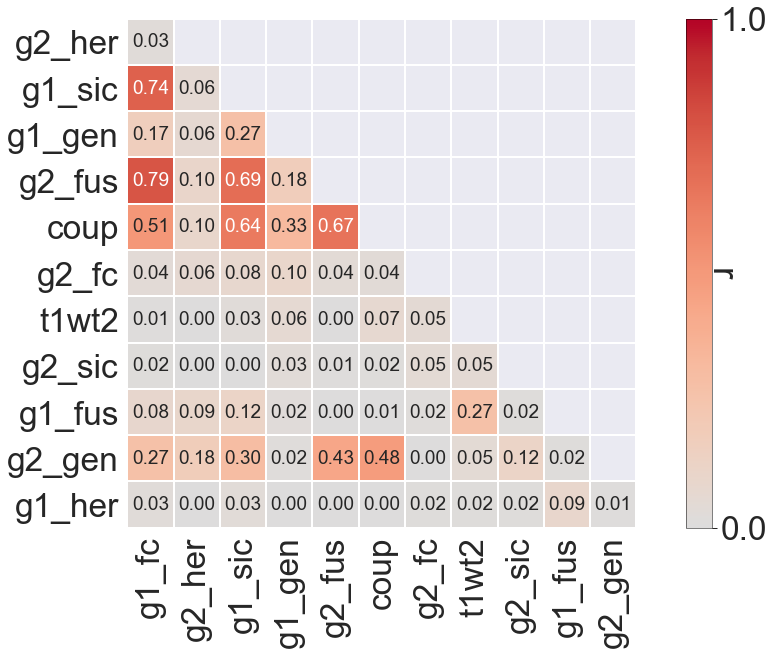

In [27]:
f = plot_sorted_df(DF, 
                   corrlist,
                   thr = 0,
                   vmax = 1,
                   )

#plt.savefig('../figures/heatmap_LCA_rsquared.svg',dpi=300)

# DG

In [28]:
corrlist = ['g1_fc', #A-P
            'g2_her',
            'g1_sic',
            'g1_gen',
            'g2_fus',
            'coup',
            
            'g2_fc', #M-L
            't1wt2',
            'g2_sic',
            'g1_fus',
            'g2_gen',
            'g1_her', 
               ]

df = pd.DataFrame(index = corrlist, columns = corrlist)


In [29]:
#df.loc['g1_fc']['g1_fc'] = polyfit(G1_fc_LDG, G1_fc_LDG, 1)['determination']
df.loc['g1_fc']['g2_her'] = polyfit(G1_fc_LDG, G2_herit_LDG, 1)['determination']
df.loc['g1_fc']['g1_sic'] = polyfit(G1_fc_LDG, G1_sic_LDG, 1)['determination']
df.loc['g1_fc']['g1_gen'] = polyfit(G1_fc_LDG, G1_gen_LDG, 1)['determination']
df.loc['g1_fc']['g2_fus'] = polyfit(G1_fc_LDG, G2_fus_LDG, 1)['determination']
df.loc['g1_fc']['coup'] = polyfit(G1_fc_LDG, r_LDG, 1)['determination']
df.loc['g1_fc']['g2_fc'] = polyfit(G1_fc_LDG, G2_fc_LDG, 1)['determination']
df.loc['g1_fc']['t1wt2'] = polyfit(G1_fc_LDG, np.log(group_t1wt2w_LDG), 1)['determination']
df.loc['g1_fc']['g2_sic'] = polyfit(G1_fc_LDG, G2_sic_LDG, 1)['determination']
df.loc['g1_fc']['g1_fus'] = polyfit(G1_fc_LDG, G1_fus_LDG, 1)['determination']
df.loc['g1_fc']['g2_gen'] = polyfit(G1_fc_LDG, G2_gen_LDG, 1)['determination']
df.loc['g1_fc']['g1_her'] = polyfit(G1_fc_LDG, G1_herit_LDG, 1)['determination']

df.loc['g2_her']['g1_fc'] = polyfit(G2_herit_LDG, G1_fc_LDG, 1)['determination']
#df.loc['g2_her']['g2_her'] = polyfit(G2_herit_LDG, G2_herit__LDG, 1)['determination']
df.loc['g2_her']['g1_sic'] = polyfit(G2_herit_LDG, G1_sic_LDG, 1)['determination']
df.loc['g2_her']['g1_gen'] = polyfit(G2_herit_LDG, G1_gen_LDG, 1)['determination']
df.loc['g2_her']['g2_fus'] = polyfit(G2_herit_LDG, G2_fus_LDG, 1)['determination']
df.loc['g2_her']['coup'] = polyfit(G2_herit_LDG, r_LDG, 1)['determination']
df.loc['g2_her']['g2_fc'] = polyfit(G2_herit_LDG, G2_fc_LDG, 1)['determination']
df.loc['g2_her']['t1wt2'] = polyfit(G2_herit_LDG, np.log(group_t1wt2w_LDG), 1)['determination']
df.loc['g2_her']['g2_sic'] = polyfit(G2_herit_LDG, G2_sic_LDG, 1)['determination']
df.loc['g2_her']['g1_fus'] = polyfit(G2_herit_LDG, G1_fus_LDG, 1)['determination']
df.loc['g2_her']['g2_gen'] = polyfit(G2_herit_LDG, G2_gen_LDG, 1)['determination']
df.loc['g2_her']['g1_her'] = polyfit(G2_herit_LDG, G1_herit_LDG, 1)['determination']

#df

df.loc['g1_sic']['g1_fc'] = polyfit(G1_sic_LDG, G1_fc_LDG, 1)['determination']
df.loc['g1_sic']['g2_her'] = polyfit(G1_sic_LDG, G2_herit_LDG, 1)['determination']
#df.loc['g1_sic']['g1_sic'] = polyfit(G1_sic_LDG, G1_sic_LDG, 1)['determination']
df.loc['g1_sic']['g1_gen'] = polyfit(G1_sic_LDG, G1_gen_LDG, 1)['determination']
df.loc['g1_sic']['g2_fus'] = polyfit(G1_sic_LDG, G2_fus_LDG, 1)['determination']
df.loc['g1_sic']['coup'] = polyfit(G1_sic_LDG, r_LDG, 1)['determination']
df.loc['g1_sic']['g2_fc'] = polyfit(G1_sic_LDG, G2_fc_LDG, 1)['determination']
df.loc['g1_sic']['t1wt2'] = polyfit(G1_sic_LDG, np.log(group_t1wt2w_LDG), 1)['determination']
df.loc['g1_sic']['g2_sic'] = polyfit(G1_sic_LDG, G2_sic_LDG, 1)['determination']
df.loc['g1_sic']['g1_fus'] = polyfit(G1_sic_LDG, G1_fus_LDG, 1)['determination']
df.loc['g1_sic']['g2_gen'] = polyfit(G1_sic_LDG, G2_gen_LDG, 1)['determination']
df.loc['g1_sic']['g1_her'] = polyfit(G1_sic_LDG, G1_herit_LDG, 1)['determination']

#df

df.loc['g1_gen']['g1_fc'] = polyfit(G1_gen_LDG, G1_fc_LDG, 1)['determination']
df.loc['g1_gen']['g2_her'] = polyfit(G1_gen_LDG, G2_herit_LDG, 1)['determination']
df.loc['g1_gen']['g1_sic'] = polyfit(G1_gen_LDG, G1_sic_LDG, 1)['determination']
#df.loc['g1_gen']['g1_gen'] = polyfit(G1_gen_LDG, G1_gen_LDG, 1)['determination']
df.loc['g1_gen']['g2_fus'] = polyfit(G1_gen_LDG, G2_fus_LDG, 1)['determination']
df.loc['g1_gen']['coup'] = polyfit(G1_gen_LDG, r_LDG, 1)['determination']
df.loc['g1_gen']['g2_fc'] = polyfit(G1_gen_LDG, G2_fc_LDG, 1)['determination']
df.loc['g1_gen']['t1wt2'] = polyfit(G1_gen_LDG, np.log(group_t1wt2w_LDG), 1)['determination']
df.loc['g1_gen']['g2_sic'] = polyfit(G1_gen_LDG, G2_sic_LDG, 1)['determination']
df.loc['g1_gen']['g1_fus'] = polyfit(G1_gen_LDG, G1_fus_LDG, 1)['determination']
df.loc['g1_gen']['g2_gen'] = polyfit(G1_gen_LDG, G2_gen_LDG, 1)['determination']
df.loc['g1_gen']['g1_her'] = polyfit(G1_gen_LDG, G1_herit_LDG, 1)['determination']


#df


df.loc['g2_fus']['g1_fc'] = polyfit(G2_fus_LDG, G1_fc_LDG, 1)['determination']
df.loc['g2_fus']['g2_her'] = polyfit(G2_fus_LDG, G2_herit_LDG, 1)['determination']
df.loc['g2_fus']['g1_sic'] = polyfit(G2_fus_LDG, G1_sic_LDG, 1)['determination']
df.loc['g2_fus']['g1_gen'] = polyfit(G2_fus_LDG, G1_gen_LDG, 1)['determination']
#df.loc['g2_fus']['g2_fus'] = polyfit(G2_fus_LDG, G2_fus_LDG, 1)['determination']
df.loc['g2_fus']['coup'] = polyfit(G2_fus_LDG, r_LDG, 1)['determination']
df.loc['g2_fus']['g2_fc'] = polyfit(G2_fus_LDG, G2_fc_LDG, 1)['determination']
df.loc['g2_fus']['t1wt2'] = polyfit(G2_fus_LDG, np.log(group_t1wt2w_LDG), 1)['determination']
df.loc['g2_fus']['g2_sic'] = polyfit(G2_fus_LDG, G2_sic_LDG, 1)['determination']
df.loc['g2_fus']['g1_fus'] = polyfit(G2_fus_LDG, G1_fus_LDG, 1)['determination']
df.loc['g2_fus']['g2_gen'] = polyfit(G2_fus_LDG, G2_gen_LDG, 1)['determination']
df.loc['g2_fus']['g1_her'] = polyfit(G2_fus_LDG, G1_herit_LDG, 1)['determination']


#df

df.loc['coup']['g1_fc'] = polyfit(r_LDG, G1_fc_LDG, 1)['determination']
df.loc['coup']['g2_her'] = polyfit(r_LDG, G2_herit_LDG, 1)['determination']
df.loc['coup']['g1_sic'] = polyfit(r_LDG, G1_sic_LDG, 1)['determination']
df.loc['coup']['g1_gen'] = polyfit(r_LDG, G1_gen_LDG, 1)['determination']
df.loc['coup']['g2_fus'] = polyfit(r_LDG, G2_fus_LDG, 1)['determination']
#df.loc['coup']['coup'] = polyfit(r_LDG, r_LDG, 1)['determination']
df.loc['coup']['g2_fc'] = polyfit(r_LDG, G2_fc_LDG, 1)['determination']
df.loc['coup']['t1wt2'] = polyfit(r_LDG, np.log(group_t1wt2w_LDG), 1)['determination']
df.loc['coup']['g2_sic'] = polyfit(r_LDG, G2_sic_LDG, 1)['determination']
df.loc['coup']['g1_fus'] = polyfit(r_LDG, G1_fus_LDG, 1)['determination']
df.loc['coup']['g2_gen'] = polyfit(r_LDG, G2_gen_LDG, 1)['determination']
df.loc['coup']['g1_her'] = polyfit(r_LDG, G1_herit_LDG, 1)['determination']


#df

df.loc['g2_fc']['g1_fc'] = polyfit(G2_fc_LDG, G1_fc_LDG, 1)['determination']
df.loc['g2_fc']['g2_her'] = polyfit(G2_fc_LDG, G2_herit_LDG, 1)['determination']
df.loc['g2_fc']['g1_sic'] = polyfit(G2_fc_LDG, G1_sic_LDG, 1)['determination']
df.loc['g2_fc']['g1_gen'] = polyfit(G2_fc_LDG, G1_gen_LDG, 1)['determination']
df.loc['g2_fc']['g2_fus'] = polyfit(G2_fc_LDG, G2_fus_LDG, 1)['determination']
df.loc['g2_fc']['coup'] = polyfit(G2_fc_LDG, r_LDG, 1)['determination']
#df.loc['g2_fc']['g2_fc'] = polyfit(G2_fc_LDG, G2_fc_LDG, 1)['determination']
df.loc['g2_fc']['t1wt2'] = polyfit(G2_fc_LDG, np.log(group_t1wt2w_LDG), 1)['determination']
df.loc['g2_fc']['g2_sic'] = polyfit(G2_fc_LDG, G2_sic_LDG, 1)['determination']
df.loc['g2_fc']['g1_fus'] = polyfit(G2_fc_LDG, G1_fus_LDG, 1)['determination']
df.loc['g2_fc']['g2_gen'] = polyfit(G2_fc_LDG, G2_gen_LDG, 1)['determination']
df.loc['g2_fc']['g1_her'] = polyfit(G2_fc_LDG, G1_herit_LDG, 1)['determination']


#df

df.loc['t1wt2']['g1_fc'] = polyfit(np.log(group_t1wt2w_LDG), G1_fc_LDG, 1)['determination']
df.loc['t1wt2']['g2_her'] = polyfit(np.log(group_t1wt2w_LDG), G2_herit_LDG, 1)['determination']
df.loc['t1wt2']['g1_sic'] = polyfit(np.log(group_t1wt2w_LDG), G1_sic_LDG, 1)['determination']
df.loc['t1wt2']['g1_gen'] = polyfit(np.log(group_t1wt2w_LDG), G1_gen_LDG, 1)['determination']
df.loc['t1wt2']['g2_fus'] = polyfit(np.log(group_t1wt2w_LDG), G2_fus_LDG, 1)['determination']
df.loc['t1wt2']['coup'] = polyfit(np.log(group_t1wt2w_LDG), r_LDG, 1)['determination']
df.loc['t1wt2']['g2_fc'] = polyfit(np.log(group_t1wt2w_LDG), G2_fc_LDG, 1)['determination']
#df.loc['t1wt2']['t1wt2'] = polyfit(np.log(group_t1wt2w_LDG, 1)['determination'], np.log(group_t1wt2w_LDG), 1)['determination']
df.loc['t1wt2']['g2_sic'] = polyfit(np.log(group_t1wt2w_LDG), G2_sic_LDG, 1)['determination']
df.loc['t1wt2']['g1_fus'] = polyfit(np.log(group_t1wt2w_LDG), G1_fus_LDG, 1)['determination']
df.loc['t1wt2']['g2_gen'] = polyfit(np.log(group_t1wt2w_LDG), G2_gen_LDG, 1)['determination']
df.loc['t1wt2']['g1_her'] = polyfit(np.log(group_t1wt2w_LDG), G1_herit_LDG, 1)['determination']


#df

df.loc['g2_sic']['g1_fc'] = polyfit(G2_sic_LDG, G1_fc_LDG, 1)['determination']
df.loc['g2_sic']['g2_her'] = polyfit(G2_sic_LDG, G2_herit_LDG, 1)['determination']
df.loc['g2_sic']['g1_sic'] = polyfit(G2_sic_LDG, G1_sic_LDG, 1)['determination']
df.loc['g2_sic']['g1_gen'] = polyfit(G2_sic_LDG, G1_gen_LDG, 1)['determination']
df.loc['g2_sic']['g2_fus'] = polyfit(G2_sic_LDG, G2_fus_LDG, 1)['determination']
df.loc['g2_sic']['coup'] = polyfit(G2_sic_LDG, r_LDG, 1)['determination']
df.loc['g2_sic']['g2_fc'] = polyfit(G2_sic_LDG, G2_fc_LDG, 1)['determination']
df.loc['g2_sic']['t1wt2'] = polyfit(G2_sic_LDG, np.log(group_t1wt2w_LDG), 1)['determination']
#df.loc['g2_sic']['g2_sic'] = polyfit(G2_sic_LDG, G2_sic_LDG, 1)['determination']
df.loc['g2_sic']['g1_fus'] = polyfit(G2_sic_LDG, G1_fus_LDG, 1)['determination']
df.loc['g2_sic']['g2_gen'] = polyfit(G2_sic_LDG, G2_gen_LDG, 1)['determination']
df.loc['g2_sic']['g1_her'] = polyfit(G2_sic_LDG, G1_herit_LDG, 1)['determination']


#df

df.loc['g1_fus']['g1_fc'] = polyfit(G1_fus_LDG, G1_fc_LDG, 1)['determination']
df.loc['g1_fus']['g2_her'] = polyfit(G1_fus_LDG, G2_herit_LDG, 1)['determination']
df.loc['g1_fus']['g1_sic'] = polyfit(G1_fus_LDG, G1_sic_LDG, 1)['determination']
df.loc['g1_fus']['g1_gen'] = polyfit(G1_fus_LDG, G1_gen_LDG, 1)['determination']
df.loc['g1_fus']['g2_fus'] = polyfit(G1_fus_LDG, G2_fus_LDG, 1)['determination']
df.loc['g1_fus']['coup'] = polyfit(G1_fus_LDG, r_LDG, 1)['determination']
df.loc['g1_fus']['g2_fc'] = polyfit(G1_fus_LDG, G2_fc_LDG, 1)['determination']
df.loc['g1_fus']['t1wt2'] = polyfit(G1_fus_LDG, np.log(group_t1wt2w_LDG), 1)['determination']
df.loc['g1_fus']['g2_sic'] = polyfit(G1_fus_LDG, G2_sic_LDG, 1)['determination']
#df.loc['g1_fus']['g1_fus'] = polyfit(G1_fus_LDG, G1_fus_LDG, 1)['determination']
df.loc['g1_fus']['g2_gen'] = polyfit(G1_fus_LDG, G2_gen_LDG, 1)['determination']
df.loc['g1_fus']['g1_her'] = polyfit(G1_fus_LDG, G1_herit_LDG, 1)['determination']



df.loc['g2_gen']['g1_fc'] = polyfit(G2_gen_LDG, G1_fc_LDG, 1)['determination']
df.loc['g2_gen']['g2_her'] = polyfit(G2_gen_LDG, G2_herit_LDG, 1)['determination']
df.loc['g2_gen']['g1_sic'] = polyfit(G2_gen_LDG, G1_sic_LDG, 1)['determination']
df.loc['g2_gen']['g1_gen'] = polyfit(G2_gen_LDG, G1_gen_LDG, 1)['determination']
df.loc['g2_gen']['g2_fus'] = polyfit(G2_gen_LDG, G2_fus_LDG, 1)['determination']
df.loc['g2_gen']['coup'] = polyfit(G2_gen_LDG, r_LDG, 1)['determination']
df.loc['g2_gen']['g2_fc'] = polyfit(G2_gen_LDG, G2_fc_LDG, 1)['determination']
df.loc['g2_gen']['t1wt2'] = polyfit(G2_gen_LDG, np.log(group_t1wt2w_LDG), 1)['determination']
df.loc['g2_gen']['g2_sic'] = polyfit(G2_gen_LDG, G2_sic_LDG, 1)['determination']
df.loc['g2_gen']['g1_fus'] = polyfit(G2_gen_LDG, G1_fus_LDG, 1)['determination']
#df.loc['g2_gen']['g2_gen'] = polyfit(G2_gen_LDG, G2_gen_LDG, 1)['determination']
df.loc['g2_gen']['g1_her'] = polyfit(G2_gen_LDG, G1_herit_LDG, 1)['determination']


#df

df.loc['g1_her']['g1_fc'] = polyfit(G1_herit_LDG, G1_fc_LDG, 1)['determination']
df.loc['g1_her']['g2_her'] = polyfit(G1_herit_LDG, G2_herit_LDG, 1)['determination']
df.loc['g1_her']['g1_sic'] = polyfit(G1_herit_LDG, G1_sic_LDG, 1)['determination']
df.loc['g1_her']['g1_gen'] = polyfit(G1_herit_LDG, G1_gen_LDG, 1)['determination']
df.loc['g1_her']['g2_fus'] = polyfit(G1_herit_LDG, G2_fus_LDG, 1)['determination']
df.loc['g1_her']['coup'] = polyfit(G1_herit_LDG, r_LDG, 1)['determination']
df.loc['g1_her']['g2_fc'] = polyfit(G1_herit_LDG, G2_fc_LDG, 1)['determination']
df.loc['g1_her']['t1wt2'] = polyfit(G1_herit_LDG, np.log(group_t1wt2w_LDG), 1)['determination']
df.loc['g1_her']['g2_sic'] = polyfit(G1_herit_LDG, G2_sic_LDG, 1)['determination']
df.loc['g1_her']['g1_fus'] = polyfit(G1_herit_LDG, G1_fus_LDG, 1)['determination']
df.loc['g1_her']['g2_gen'] = polyfit(G1_herit_LDG, G2_gen_LDG, 1)['determination']
#df.loc['g1_her']['g1_her'] = polyfit(G1_herit_LDG, G1_herit_LDG, 1)['determination']


#df


In [30]:
DF_LDG = df.copy()
A = DF_LDG.values.astype(float)
print(np.allclose(A, A.T, equal_nan=True))

B = A.copy()
    
DF= pd.DataFrame(index = corrlist,
                 columns=corrlist,
                 data = B)    
    

True


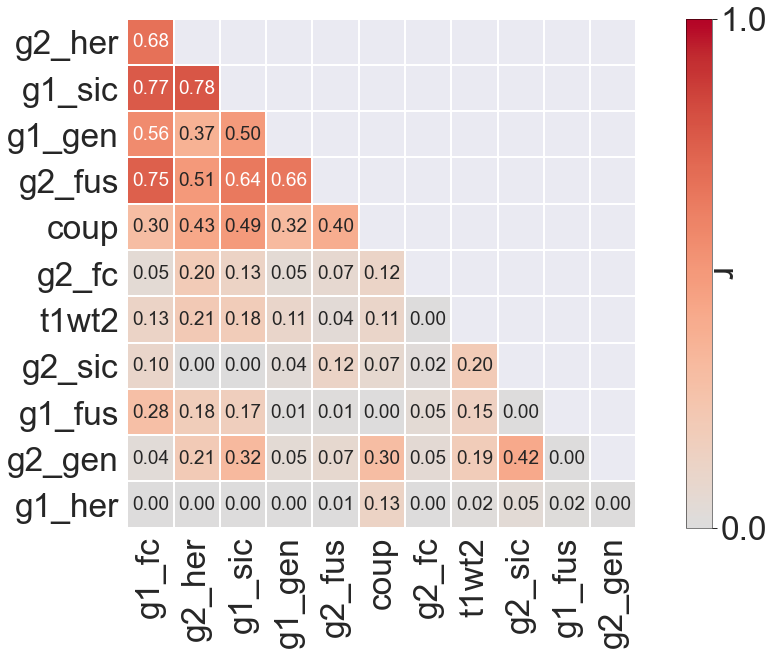

In [31]:
f = plot_sorted_df(DF, 
                   corrlist,
                   thr = 0,
                   vmax = 1,
                   )

#plt.savefig('../figures/heatmap_LDG_rsquared.svg',dpi=300)